In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# 1.	Data Cleaning and Preparation

In [2]:
df=pd.read_csv('Cardiotocographic.csv')

In [3]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
df.tail()

LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2121  140.0  0.000000  0.961268  0.007426  0.0  0.0  0.0  79.0   0.2   
2122  140.0  0.000775  0.000000  0.006979  0.0  0.0  0.0  78.0   0.4   
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  0.0  79.0   0.4   
2124  140.0  0.000679  0.000000  0.006110  0.0  0.0  0.0  78.0   0.4   
2125  142.0  0.001616 -0.000188  0.008078  0.0  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency       NSP  
2121  25.000000   7.2   40.0       0.0  2.000000  
2122  22.000000   7.1   66.0       1.0  2.000000  
2123  20.000000   6.1   67.0       1.0  1.990464  
2124  27.000000   7.0   66.0       1.0  2.000000  
2125  35.857183   5.0   42.0       0.0  1.000000

In [6]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [7]:
# Handle missing values by imputing the mean
df.fillna(df.mean(), inplace=True)

In [8]:
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [9]:
# Detect and handle outliers using the Z-score method
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

In [10]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2120  140.000000  0.000000  0.000000  0.004975  0.001244  0.0  0.0  77.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2120   0.7  17.000000   6.0   31.0  0.000000  1.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[1869 rows x 14 columns]

# 2.	Statistical Summary

In [11]:
df.describe()

LB           AC           FM           UC           DL  \
count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
mean    133.306955     0.003194     0.004240     0.004391     0.001732   
std       9.899631     0.003767     0.013554     0.002904     0.002705   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002002     0.000000   
50%     133.000000     0.001733     0.000000     0.004556     0.000000   
75%     141.000000     0.005650     0.002358     0.006579     0.003036   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.869000e+03  1869.000000  1869.000000  1869.000000  1869.000000   
mean   3.736781e-08     0.000102    46.870868     1.283173     9.193894   
std    6.367633e-07     0.000404    16.834525     0.778099    16.574763   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    48.000000     1.200000     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000    11.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    73.000000   

              MLTV        Width     Tendency          NSP  
count  1869.000000  1869.000000  1869.000000  1869.000000  
mean      8.329351    68.930613     0.332264     1.244957  
std       5.226398    37.614026     0.600830     0.528625  
min      -0.200788     7.000000    -1.006614     0.967075  
25%       4.900000    37.000000     0.000000     1.000000  
50%       7.700000    66.000000     0.000000     1.000000  
75%      10.900000    98.000000     1.000000     1.000000  
max      29.500000   180.000000     1.023635     3.034545

# 3.	Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

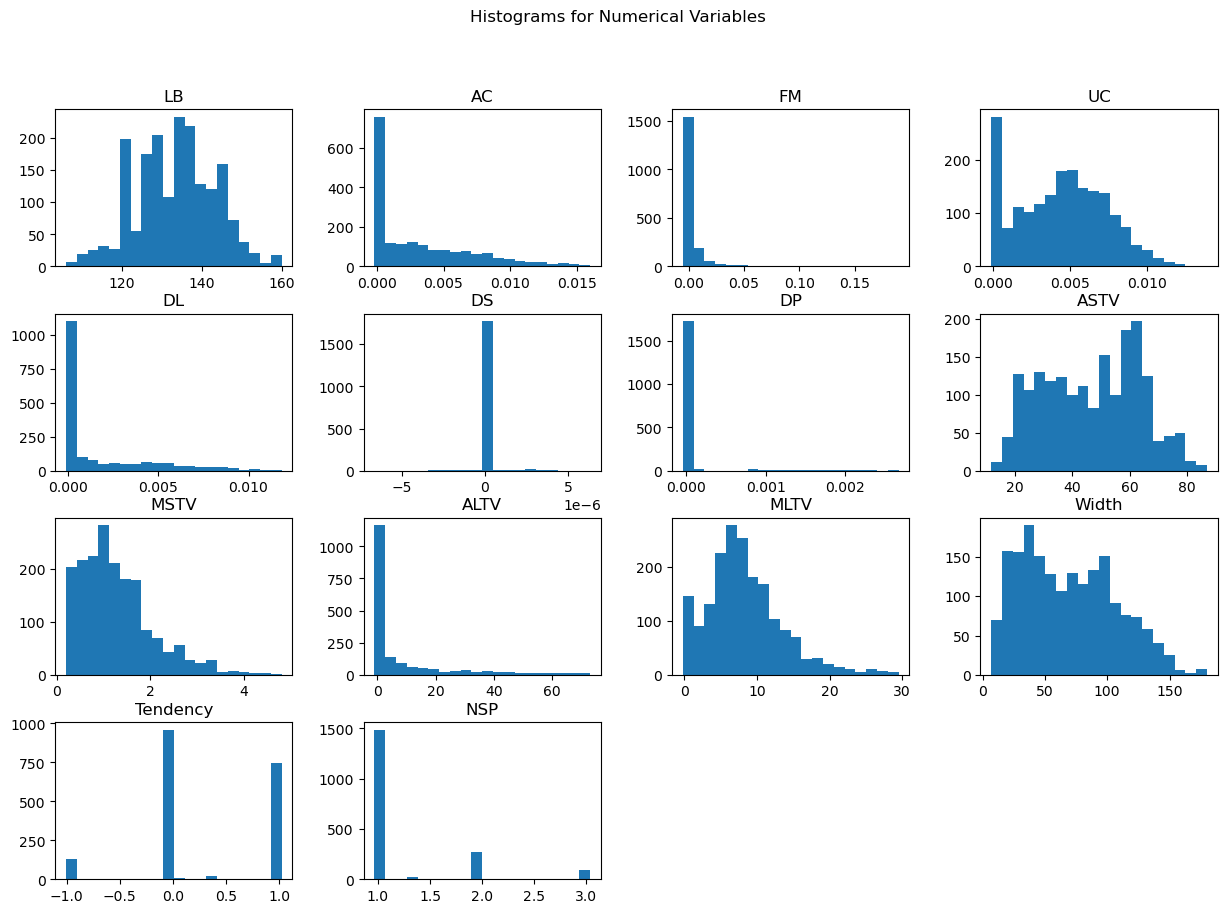

In [15]:
# Histograms
df[numerical_columns].hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle("Histograms for Numerical Variables")
plt.show()

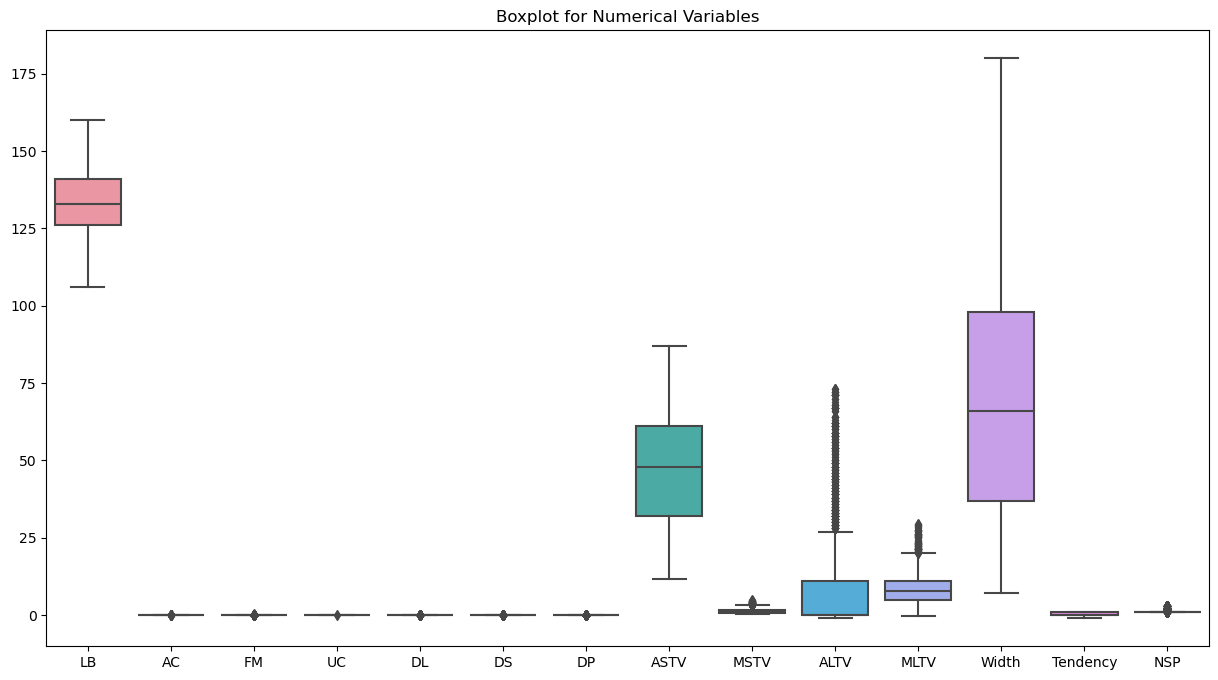

In [16]:
# Boxplots

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot for Numerical Variables")
plt.show()


In [17]:
categorical_columns

Index([], dtype='object')

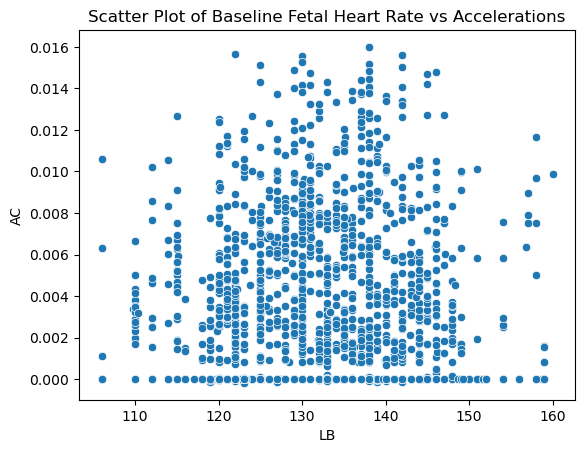

In [18]:
# Scatter plots for relationships between pairs of variables

sns.scatterplot(x='LB', y='AC', data=df)
plt.title('Scatter Plot of Baseline Fetal Heart Rate vs Accelerations')
plt.show()


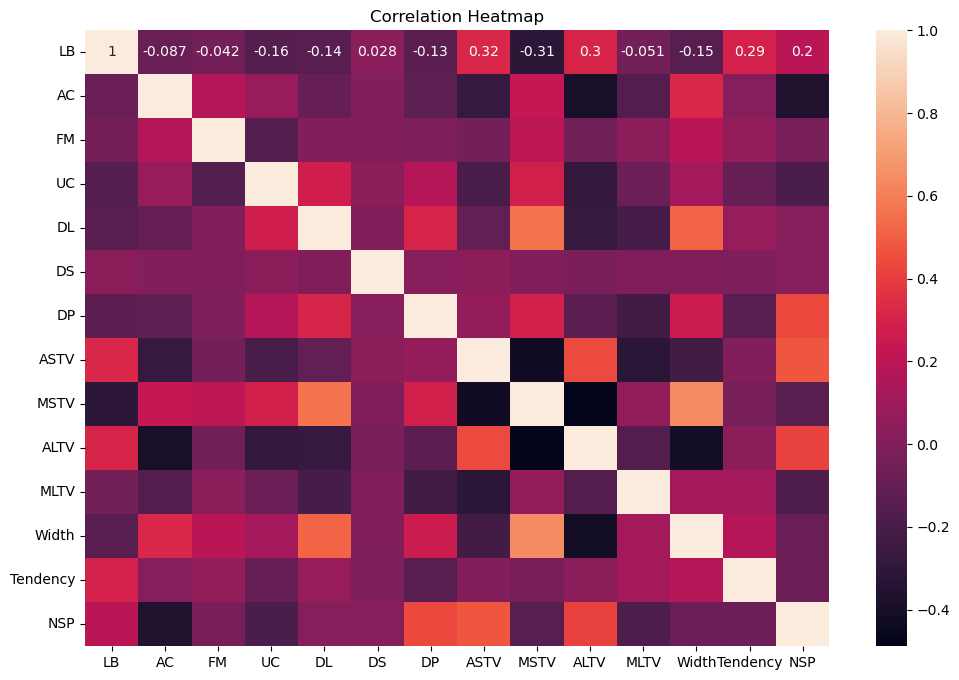

In [19]:
# Correlation Heatmap
correlation=df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
import warnings
warnings.filterwarnings("ignore")

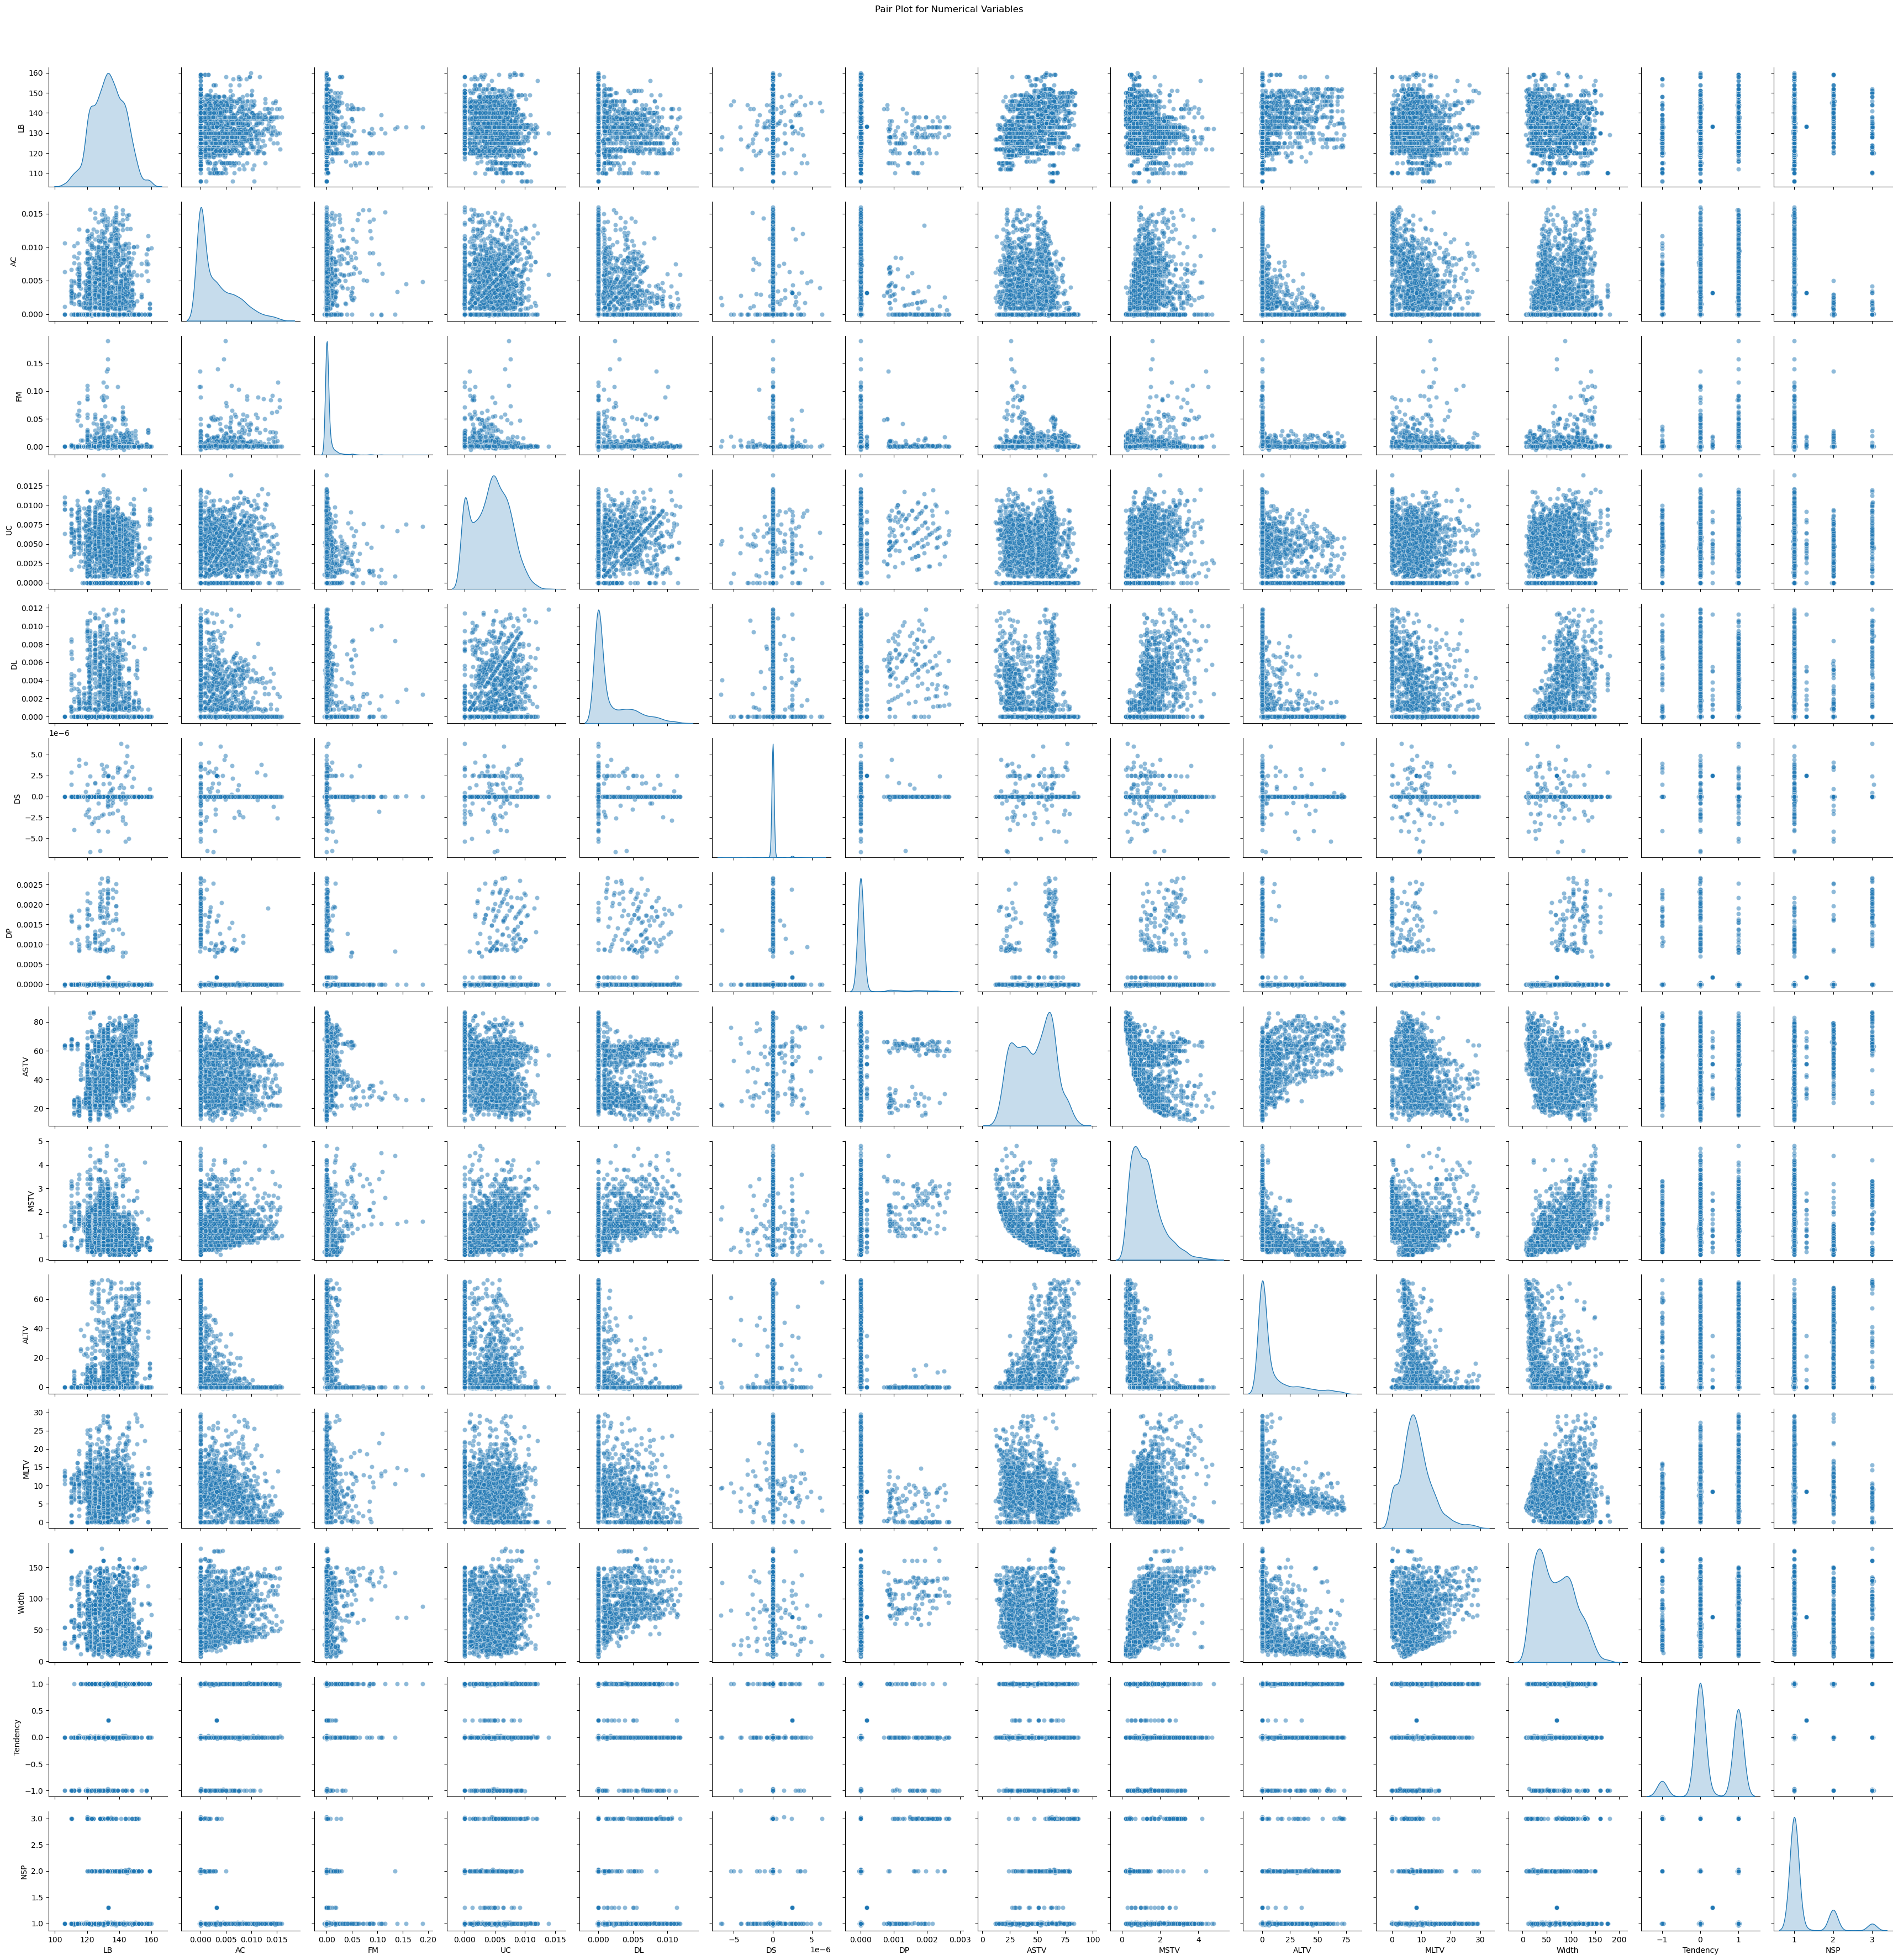

In [21]:
# Pair plot for all numerical variables
sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot for Numerical Variables", y=1.02)
plt.show()


# 4.	Pattern Recognition and Insights


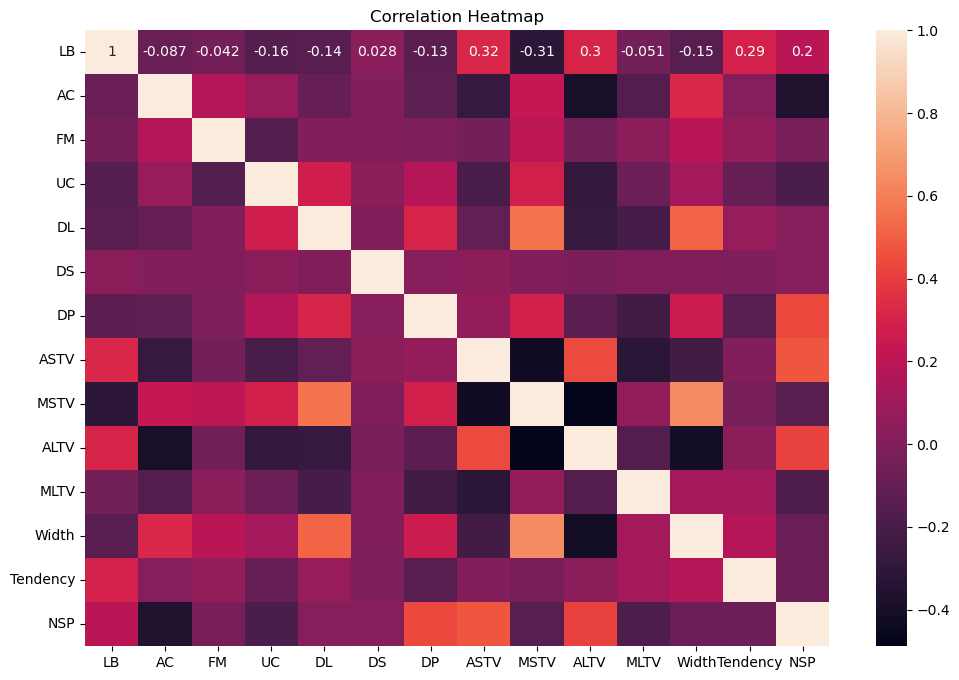

In [23]:
# Correlation Heatmap
correlation=df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap")
plt.show()

## 5. Conclusion
The exploratory analysis revealed significant correlations among various fetal health metrics. Notably, strong positive correlations between fetal movement (`FM`) and accelerations (`AC`) suggest that increased fetal activity is linked to improved heart rate patterns. Additionally, the identification of outliers highlighted data points that deviate from expected norms, prompting further investigation into their validity.

These findings have important clinical implications; they can inform healthcare providers about the critical relationships between monitored variables, potentially leading to improved fetal monitoring practices. Trends observed over time may indicate advancements or declines in specific metrics, guiding resource allocation and clinical decision-making.

Overall, the insights gained from this analysis provide a valuable foundation for developing predictive models, shaping policies, and identifying areas for further research, ultimately contributing to enhanced outcomes in fetal health monitoring and maternal care.